In [1]:
from bs4 import BeautifulSoup as soup
from selenium import webdriver

import requests

In [2]:
import pandas as pd

In [124]:
driver = webdriver.Chrome("C:\\Users\\User\\Desktop\\University\\Advanced Programming\\Project\\chromedriver.exe")

In [32]:
#method for finding urls from request
def parse_urls(body):
    page_soup = soup(body, "html.parser")
    containers = page_soup.findAll("div", {"class":"tn-article-item"})
    urls = []
    for c in containers:
        if(c.a != None):
            urls.append(c.a["href"])
    # urls = [c.a["href"] for c in containers]
    return urls

In [2]:
# USED LISTS

page_url_list=[] #parsed pages
all_urls=[] #all urls of every page
dataFrame =[] #unique sorted urls
sorted_list = [] #sorted by crime keywords

In [56]:
url = 'https://tengrinews.kz/accidents/page/{page}/'

In [57]:
page = 0
while page<400:
    page += 1
    r = requests.get(url.format(page=page))
    titles = parse_urls(r.text)
    page_url_list.append(titles)
    print('Succesfully parsed page: {}'.format(page))

Succesfully parsed page: 1
Succesfully parsed page: 2
Succesfully parsed page: 3
Succesfully parsed page: 4
Succesfully parsed page: 5
Succesfully parsed page: 6
Succesfully parsed page: 7
Succesfully parsed page: 8
Succesfully parsed page: 9
Succesfully parsed page: 10
Succesfully parsed page: 11
Succesfully parsed page: 12
Succesfully parsed page: 13
Succesfully parsed page: 14
Succesfully parsed page: 15
Succesfully parsed page: 16
Succesfully parsed page: 17
Succesfully parsed page: 18
Succesfully parsed page: 19
Succesfully parsed page: 20
Succesfully parsed page: 21
Succesfully parsed page: 22
Succesfully parsed page: 23
Succesfully parsed page: 24
Succesfully parsed page: 25
Succesfully parsed page: 26
Succesfully parsed page: 27
Succesfully parsed page: 28
Succesfully parsed page: 29
Succesfully parsed page: 30
Succesfully parsed page: 31
Succesfully parsed page: 32
Succesfully parsed page: 33
Succesfully parsed page: 34
Succesfully parsed page: 35
Succesfully parsed page: 36
S

Succesfully parsed page: 288
Succesfully parsed page: 289
Succesfully parsed page: 290
Succesfully parsed page: 291
Succesfully parsed page: 292
Succesfully parsed page: 293
Succesfully parsed page: 294
Succesfully parsed page: 295
Succesfully parsed page: 296
Succesfully parsed page: 297
Succesfully parsed page: 298
Succesfully parsed page: 299
Succesfully parsed page: 300
Succesfully parsed page: 301
Succesfully parsed page: 302
Succesfully parsed page: 303
Succesfully parsed page: 304
Succesfully parsed page: 305
Succesfully parsed page: 306
Succesfully parsed page: 307
Succesfully parsed page: 308
Succesfully parsed page: 309
Succesfully parsed page: 310
Succesfully parsed page: 311
Succesfully parsed page: 312
Succesfully parsed page: 313
Succesfully parsed page: 314
Succesfully parsed page: 315
Succesfully parsed page: 316
Succesfully parsed page: 317
Succesfully parsed page: 318
Succesfully parsed page: 319
Succesfully parsed page: 320
Succesfully parsed page: 321
Succesfully pa

In [36]:
print(page_url_list)

[['/crime/seks-priton-likvidirovali-v-jambyilskoy-oblasti-420176/', '/accidents/dom-razrushilsya-posle-vzryiva-gazovogo-ballona-v-hromtau-420175/', '/crime/na-jenschinu-napali-s-nojom-v-kostanae-420172/', '/accidents/kamennyiy-obval-sluchilsya-populyarnom-turisticheskom-420125/', '/events/jenschina-rebenkom-invalidom-poskolznulas-dverey-bolnitsyi-420081/', '/events/politsiya-otsepila-ulitsu-v-almatyi-420083/', '/accidents/neskolko-mashin-upali-kotlovan-iz-za-nepravilno-420084/', '/crime/organizatora-seks-pritona-prigovorili-k-sroku-v-almatyi-420025/', '/accidents/voorujennogo-mujchinu-zaderjali-v-tsentre-almatyi-420011/', '/accidents/otets-iznasilovannoy-karagandinskoy-devochki-rasskazal-420006/', '/events/mercedes-vrezalsya-verblyuda-mangistau-pogibla-jenschina-419988/', '/crime/vzyavshiy-zalojnitsyi-eks-jenu-jitel-zko-soglasen-prigovorom-419977/', '/events/snegopad-nur-sultane-100-dtp-proizoshlo-dorogah-stolitsyi-419982/', '/accidents/rabotnitsa-avtomoyki-ostalas-nogi-iz-za-netrezvog

In [59]:
for i in range(len(page_url_list)):
    for j in range(19):
            all_urls.append(page_url_list[i][j])

In [61]:
len(all_urls)

11305

In [17]:
all_urls[4]

'https://www.nur.kz/1860412-predstavlalis-rodstvennikami-pensionerov-obmanuli-na-5-mln-tenge-v-rudnom.html'

In [62]:
data = pd.DataFrame(all_urls)

In [63]:
len(data)

11305

In [64]:
uniqueValues = data[0].unique()

In [65]:
dataFrame = pd.DataFrame(uniqueValues)

In [66]:
len(dataFrame)

7600

In [67]:
#Sorting the date by CRIME

In [69]:
crime_keywords=['izbil','lishil','pogib','nasmert','iznasilova','ubit','zarezal','ranil','draka','nasmert','zastrelil','sbil',
               'grabil','telo','napal']

In [70]:
for i in range(len(dataFrame)):
    for keyword in crime_keywords:
        if(keyword in dataFrame[0][i]):
            sorted_list.append(dataFrame[0][i])

In [71]:
len(sorted_list)

1453

In [73]:
sorted_dataFrame = pd.DataFrame(sorted_list)

In [116]:
unique_dataFrame = sorted_dataFrame[0].unique()

In [117]:
len(unique_dataFrame)

1222

In [91]:
unique_dataFrame

array(['/crime/na-jenschinu-napali-s-nojom-v-kostanae-420172/',
       '/accidents/otets-iznasilovannoy-karagandinskoy-devochki-rasskazal-420006/',
       '/events/mercedes-vrezalsya-verblyuda-mangistau-pogibla-jenschina-419988/',
       ..., '/crime/otdelenie-kaspi-bank-ograbili-v-shyimkente-328639/',
       '/events/poehal-benzinom-kanistroy-paren-sel-poputku-pogib-jutkom-dtp-328464/',
       '/events/v-atyirauskoy-oblasti-jiteli-napali-na-pogranichnikov-328403/'],
      dtype=object)

In [118]:
last_data = pd.DataFrame(unique_dataFrame)

In [119]:
last_data

,0
0,/crime/na-jenschinu-napali-s-nojom-v-kostanae-...
1,/accidents/otets-iznasilovannoy-karagandinskoy...
2,/events/mercedes-vrezalsya-verblyuda-mangistau...
3,/accidents/geroinya-rolika-iznasilovanie-rassk...
4,/crime/massovaya-draka-v-stolitse-umer-syin-du...
...,...
1217,/events/sbil-popyitalsya-skryitsya-3-sotrudnik...
1218,/events/telo-propavshego-predprinimatelya-kost...
1219,/crime/otdelenie-kaspi-bank-ograbili-v-shyimke...
1220,/events/poehal-benzinom-kanistroy-paren-sel-po...


In [35]:
#Saving to CSV file

In [149]:
regions = ['Атырау','Мангистау','Актоб','ЗКО','Нур-Султан','Караганд','Алмат','Тараз','Сем',
           'ВКО','Кызылорд','СКО','Павлодар','Костанай','Туркестан','Астан','Жамбыл','Туркестан','Шымкент']
crime_keywords=['избил','лишил','погиб','насмерть','изнасиловал','убит','зарезал','ранил','драка','застрел','сбил',
               'грабил','тело','напал']
file = {'URL':[], 'Article':[], 'Region':[], 'Month':[]}

In [150]:
def save(driver, url):
    driver.get(url)
    content = driver.page_source
    my_soup = soup(content, 'html.parser')
    checkRegion = False
    title = my_soup.find('h1', attrs={'class':'tn-content-title'}).text
    file['Article'].append(title)
    month = my_soup.findAll('time')[2].text.split(' ')[1]
    file['Month'].append(month)
    for region in regions:
        if(region in title):
            file['Region'].append(region)
            checkRegion = True
            break
    if(checkRegion is False):
        file['Region'].append('Not Specified')
    file['URL'].append(url)

In [151]:
for url in unique:
    save(driver, 'https://tengrinews.kz/'+url)

In [152]:
file

{'URL': ['https://tengrinews.kz//crime/na-jenschinu-napali-s-nojom-v-kostanae-420172/',
  'https://tengrinews.kz//accidents/otets-iznasilovannoy-karagandinskoy-devochki-rasskazal-420006/',
  'https://tengrinews.kz//events/mercedes-vrezalsya-verblyuda-mangistau-pogibla-jenschina-419988/',
  'https://tengrinews.kz//accidents/geroinya-rolika-iznasilovanie-rasskazala-detali-intsidenta-419792/',
  'https://tengrinews.kz//crime/massovaya-draka-v-stolitse-umer-syin-dulata-agadila-419774/',
  'https://tengrinews.kz//events/vnedorojnik-sbil-pojilyih-jenschin-zebre-pavlodare-odna-nih-419752/',
  'https://tengrinews.kz//accidents/skoraya-nasmert-sbila-peshehoda-v-karagande-419749/',
  'https://tengrinews.kz//accidents/za-iznasilovanie-docheri-osujden-pedofil-v-baykonure-419719/',
  'https://tengrinews.kz//accidents/podruga-rasskazala-jenschine-ubitoy-tremya-detmi-pavlodare-419634/',
  'https://tengrinews.kz//accidents/podozrevaemyiy-iznasilovanii-vyipryignul-kvartiryi-roditeley-419623/',
  'https

In [153]:
len(file['Month'])

1222

In [154]:
saved_data = pd.DataFrame(file, columns=['URL', 'Article', 'Region', 'Month'])

In [166]:
saved_data

,URL,Article,Region,Month
0,https://tengrinews.kz//crime/na-jenschinu-napa...,На женщину напали с ножом в Костанае15 ноября ...,Not Specified,13:20
1,https://tengrinews.kz//accidents/otets-iznasil...,Отец изнасилованной карагандинской девочки рас...,Not Specified,ноября
2,https://tengrinews.kz//events/mercedes-vrezals...,Мercedes врезался в верблюда в Мангистау: поги...,Мангистау,ноября
3,https://tengrinews.kz//accidents/geroinya-roli...,"Героиня ролика про ""изнасилование"" рассказала ...",Not Specified,ноября
4,https://tengrinews.kz//crime/massovaya-draka-v...,Массовая драка в столице: умер сын Дулата Агад...,Not Specified,ноября
...,...,...,...,...
1217,https://tengrinews.kz//events/sbil-popyitalsya...,Сбил и попытался скрыться: 3 сотрудника скорой...,Костанай,октября
1218,https://tengrinews.kz//events/telo-propavshego...,Тело пропавшего предпринимателя из Костанайско...,Костанай,октября
1219,https://tengrinews.kz//crime/otdelenie-kaspi-b...,Отделение Kaspi Bank ограбили в Шымкенте14 окт...,Шымкент,октября
1220,https://tengrinews.kz//events/poehal-benzinom-...,"""Поехал за бензином с канистрой"". Парень сел в...",Алмат,октября


In [167]:
saved_data.to_csv (r'C:\Users\User\Desktop\TengriNews_dataframe.csv', index = False, header=True, encoding='utf-8-sig')

In [168]:
read_data = pd.read_csv('C:\\Users\\User\\Desktop\\TengriNews_dataframe.csv', encoding='utf8')

In [165]:
read_data

,URL,Article,Region,Month
0,https://tengrinews.kz//crime/na-jenschinu-napa...,На женщину напали с ножом в Костанае15 ноября ...,Not Specified,13:20
1,https://tengrinews.kz//accidents/otets-iznasil...,Отец изнасилованной карагандинской девочки рас...,Not Specified,ноября
2,https://tengrinews.kz//events/mercedes-vrezals...,Мercedes врезался в верблюда в Мангистау: поги...,Мангистау,ноября
3,https://tengrinews.kz//accidents/geroinya-roli...,"Героиня ролика про ""изнасилование"" рассказала ...",Not Specified,ноября
4,https://tengrinews.kz//crime/massovaya-draka-v...,Массовая драка в столице: умер сын Дулата Агад...,Not Specified,ноября
...,...,...,...,...
1217,https://tengrinews.kz//events/sbil-popyitalsya...,Сбил и попытался скрыться: 3 сотрудника скорой...,Костанай,октября
1218,https://tengrinews.kz//events/telo-propavshego...,Тело пропавшего предпринимателя из Костанайско...,Костанай,октября
1219,https://tengrinews.kz//crime/otdelenie-kaspi-b...,Отделение Kaspi Bank ограбили в Шымкенте14 окт...,Шымкент,октября
1220,https://tengrinews.kz//events/poehal-benzinom-...,"""Поехал за бензином с канистрой"". Парень сел в...",Алмат,октября


In [44]:
#Sorting and plotting

In [45]:
months = {'01':'январь','02':'февраль','03':'март','04':'апрель','05':'май','06':'июнь',
          '07':'июль','08':'август','09':'сентябрь','10':'октябрь','11':'ноябрь','12':'декабрь'}
regions = ['Атырау','Мангистау','Актоб','ЗКО','Нур-Султан','Караганд','Алмат',
           'ВКО','Кызылорд','СКО','Павлодар','Костанай','Туркестан']
crime_keywords=['избил','лишил','погиб','насмерть','изнасиловал','убит','зарезал','ранил','драка','застрел','сбил',
               'грабил','тело']
sort_by_regions = {}
sort_by_keywords = {}
sort_by_period = {}

In [ ]:
# FUNCTION - SORTING BY PERIOD, REGION & KEYWORD

In [46]:
def sort(driver, url):
    driver.get(url)
    content = driver.page_source
    my_soup = soup(content, 'html.parser')
    for a in my_soup.findAll('article', attrs={'class':'article'}):
        month = a.find('time').get('datetime')
        month = month.split('-')[1]
        month = months[month]
        #period
        if(month not in sort_by_period):
            sort_by_period[month] = 1
        else:
            sort_by_period[month] += 1
        title = a.find('h1', attrs={'article__headline'}).text
        #region
        for region in regions:
            if(region in title):
                if(region not in sort_by_regions):
                    sort_by_regions[region] = 1
                else:
                    sort_by_regions[region] += 1
        #keyword
        for keyword in crime_keywords:
            if(keyword in title):
                if(keyword not in sort_by_keywords):
                    sort_by_keywords[keyword] = 1
                else:
                    sort_by_keywords[keyword] += 1

In [47]:
for url in unique:
    sort(driver, url)

In [ ]:
# FUNCTION - SORTED PERIOD BY REGIONS

In [48]:
period_by_regions = {}

In [49]:
def sort2(driver, url):
    driver.get(url)
    content = driver.page_source
    my_soup = soup(content, 'html.parser')
    for a in my_soup.findAll('article', attrs={'class':'article'}):
        month = a.find('time').get('datetime')
        month = month.split('-')[1]
        month = months[month]
        #period
        if(month not in period_by_regions):
            period_by_regions[month] = {}
        title = a.find('h1', attrs={'article__headline'}).text
        #region
        for region in regions:
            if(region in title):
                if(region not in period_by_regions[month]):
                    period_by_regions[month][region] = 1
                else:
                    period_by_regions[month][region] += 1

In [50]:
for url in unique:
    sort2(driver, url)

In [51]:
period_by_regions

{'июль': {'Алмат': 1},
 'сентябрь': {},
 'апрель': {'Караганд': 2,
  'Нур-Султан': 1,
  'Алмат': 4,
  'ВКО': 1,
  'Туркестан': 1,
  'Павлодар': 1},
 'март': {'Атырау': 3,
  'Алмат': 14,
  'Караганд': 10,
  'Туркестан': 4,
  'Кызылорд': 1,
  'Нур-Султан': 2,
  'Актоб': 1,
  'Мангистау': 1,
  'Павлодар': 2,
  'Костанай': 1},
 'февраль': {'Актоб': 3,
  'Алмат': 13,
  'Караганд': 18,
  'Атырау': 3,
  'Павлодар': 3,
  'Костанай': 3,
  'СКО': 2,
  'Туркестан': 1}}

In [52]:
# Sort by region

In [53]:
data_frame = {'region':[],'count':[]}
for key in sort_by_regions:
    data_frame['region'].append(key)
    data_frame['count'].append(sort_by_regions[key])
df = pd.DataFrame.from_dict(data_frame)

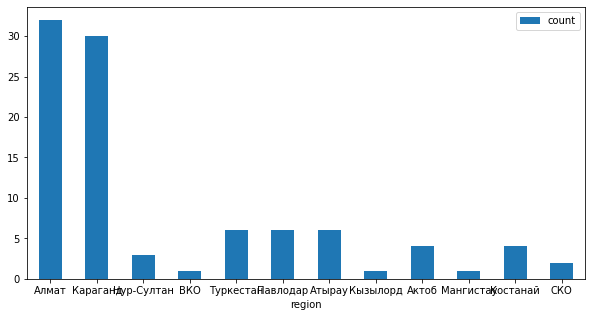

In [54]:
df.plot.bar(x='region', y='count', rot=0, figsize=(10,5))

In [55]:
# Sort by keyword

In [56]:
data_frame = {'crime_type':[],'count':[]}
for key in sort_by_keywords:
    data_frame['crime_type'].append(key)
    data_frame['count'].append(sort_by_keywords[key])
df = pd.DataFrame.from_dict(data_frame)

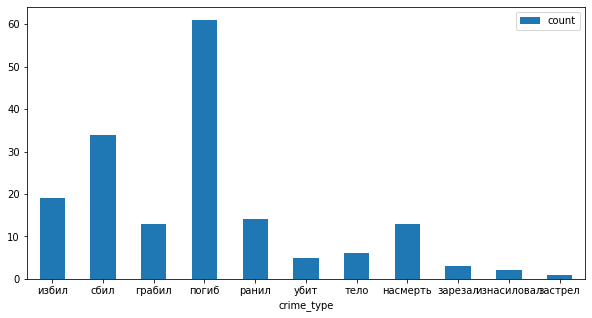

In [57]:
df.plot.bar(x='crime_type', y='count', rot=0, figsize=(10,5))

In [58]:
# Sort by Date

In [59]:
data_frame = {'month':[],'count':[]}
for key in sort_by_period:
    data_frame['month'].append(key)
    data_frame['count'].append(sort_by_period[key])
df = pd.DataFrame.from_dict(data_frame)

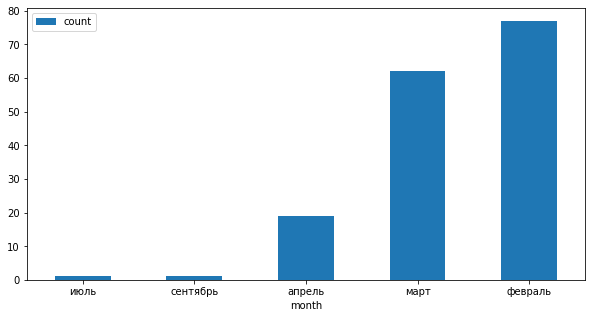

In [60]:
df.plot.bar(x='month', y='count', rot=0, figsize=(10,5))

In [61]:
#Sort by period and Region

In [62]:
df = pd.DataFrame.from_dict(period_by_regions).fillna(0)

In [63]:
df

,июль,сентябрь,апрель,март,февраль
Алмат,1.0,0.0,4.0,14.0,13.0
Караганд,0.0,0.0,2.0,10.0,18.0
Нур-Султан,0.0,0.0,1.0,2.0,0.0
ВКО,0.0,0.0,1.0,0.0,0.0
Туркестан,0.0,0.0,1.0,4.0,1.0
Павлодар,0.0,0.0,1.0,2.0,3.0
Атырау,0.0,0.0,0.0,3.0,3.0
Кызылорд,0.0,0.0,0.0,1.0,0.0
Актоб,0.0,0.0,0.0,1.0,3.0
Мангистау,0.0,0.0,0.0,1.0,0.0


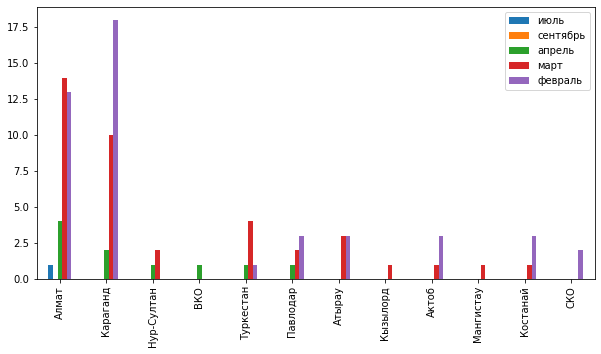

In [64]:
df.plot.bar(figsize=(10,5));